# How to extract contour components

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
plt.ion()
plt.show()

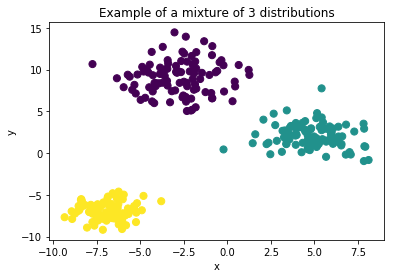

In [2]:
n_components = 3
X, truth = make_blobs(n_samples=300, centers=n_components, 
                      cluster_std = [2, 1.5, 1], 
                      random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=50, c = truth)
plt.title(f"Example of a mixture of {n_components} distributions")
plt.xlabel("x")
plt.ylabel("y");

In [3]:
x = X[:, 0]
y = X[:, 1]

## For the KDE representation, choose the boundaries:

In [4]:
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10

xmin = min(x) - deltaX
xmax = max(x) + deltaX


ymin = min(y) - deltaY
ymax = max(y) + deltaY

print(xmin, xmax, ymin, ymax)

-11.097585529030251 9.858180523990058 -11.545696279950441 16.81828998331647


In [5]:
# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

## Fit a gaussian kernel

In [6]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

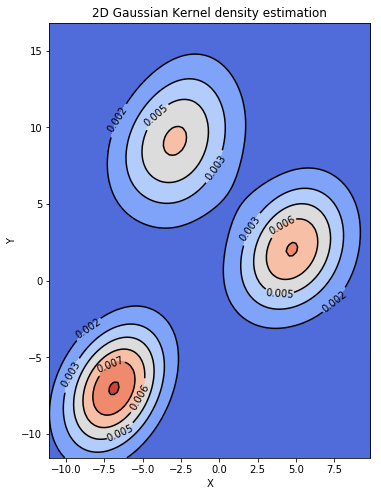

In [14]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
## Or kernel density estimate plot instead of the contourf plot
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
# Contour plot
cset = ax.contour(xx, yy, f, colors='k')
# # # Label plot
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

plt.show()

## Render KDE in 3d

In [8]:
from mpl_toolkits.mplot3d import axes3d

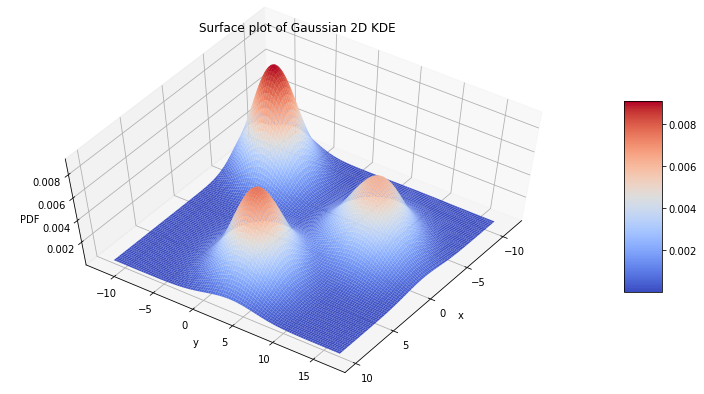

In [18]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)

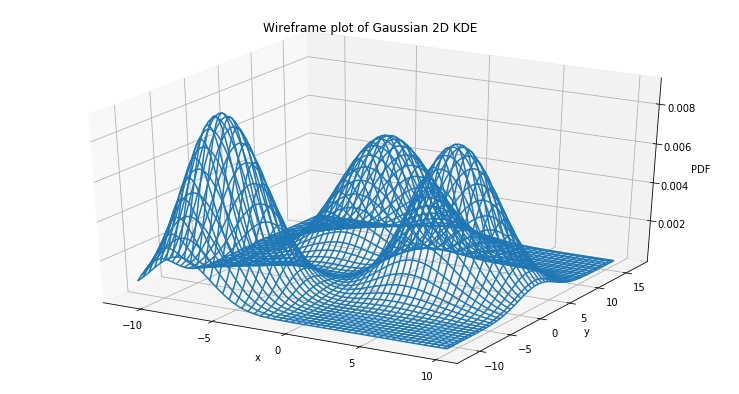

In [19]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
w = ax.plot_wireframe(xx, yy, f)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Wireframe plot of Gaussian 2D KDE');

## How to extract plot lines?

In [10]:
cset

The entire contour information is stored in a QuadContourSet object:

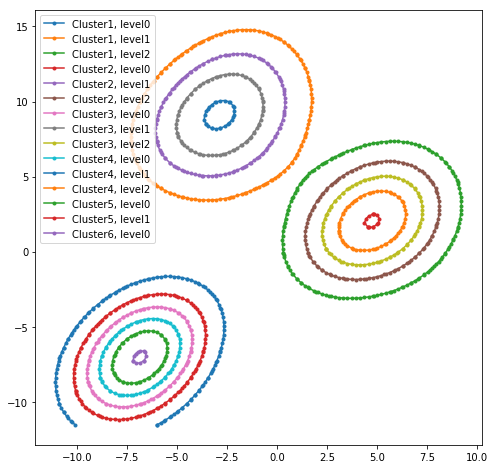

In [11]:
plt.figure(figsize=(8,8))

for j in range(len(cset.allsegs)):
    for ii, seg in enumerate(cset.allsegs[j]):
        plt.plot(seg[:,0], seg[:,1], '.-', label=f'Cluster{j}, level{ii}')

plt.legend()


In [12]:
for l in cset.labelTexts:
    print(l)

Text(-8.557492674118699, -3.094611978129585, '0.002')
Text(-6.633558571170124, 10.515181924812705, '0.002')
Text(7.529762073654467, -1.335207891796518, '0.002')
Text(-9.696214115178515, -6.102102956697198, '0.003')
Text(-0.24189561266798698, 7.363627895560828, '0.003')
Text(2.026227554679437, 3.440017551928893, '0.003')
Text(-6.4407486283590725, -9.926103856294695, '0.005')
Text(-4.112330178023482, 10.804328245191101, '0.005')
Text(3.931297195863099, -0.8739071794353457, '0.005')
Text(-5.170702200903296, -7.577043077425909, '0.006')
Text(4.123667604456408, 3.6390640428086094, '0.006')
Text(-7.075771842086961, -5.468264504947445, '0.007')


## Render data with histogram 2d

Use histogram 2d to get the areas with the highest surface

(array([[13.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [41., 23.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.],
        [ 6.,  7.,  0.,  0.,  0.,  0.,  5., 11.,  5.,  1.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  5., 13., 10.,  4.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  9.,  2.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  3.,  5.,  0.],
        [ 0.,  0.,  0.,  1.,  5.,  3.,  0.,  1.,  1.,  0.],
        [ 0.,  0.,  0.,  2., 19., 11.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1., 23., 15.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  5.,  8.,  4.,  0.,  0.,  0.,  0.]]),
 array([-9.35127169, -7.60495785, -5.85864402, -4.11233018, -2.36601634,
        -0.6197025 ,  1.12661134,  2.87292517,  4.61923901,  6.36555285,
         8.11186669]),
 array([-9.18203076, -6.81836524, -4.45469971, -2.09103419,  0.27263133,
         2.63629685,  4.99996237,  7.3636279 ,  9.72729342, 12.09095894,
        14.45462446]),
 <matplotlib.collections.QuadMesh at 0x16cf05caf60>)

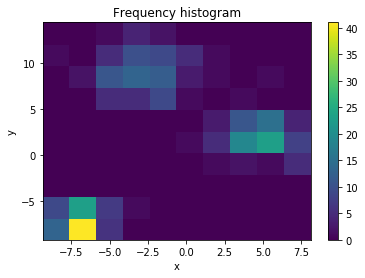

In [23]:
h =plt.hist2d(x, y)
plt.colorbar(h[3])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Frequency histogram')
h

Pass normed = True to get the PDF

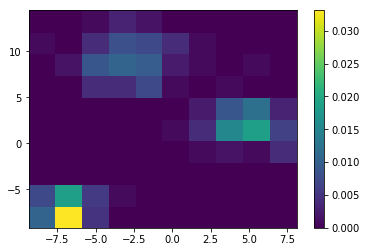

In [22]:
h =plt.hist2d(x, y, normed = True)
plt.colorbar(h[3]);